# Exploratory Data Analysis

## 1. Analysis
   #### Univariate Analysis
   #### Multivariate Analysis
## 2. Feature Engineering
   #### Creating new columns
   ####  Modifying existing ones
## 3. Handling Outliers
   ####  Detect Outliers
   #### Remove Outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('C:/Users/deepa/Pandas/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('C:/Users/deepa/Pandas/test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
import pandas as pd

df = pd.concat([train, test], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
df['Survived'] = df['Survived'].fillna(0)
df['Survived']

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [14]:
df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])

Parch Survived          
           count      mean
0     0     1002  0.232535
1     1      170  0.382353
2     2      113  0.353982
3     3        8  0.375000
4     4        6  0.000000
5     5        6  0.166667
6     6        2  0.000000
7     9        2  0.000000

In [15]:
df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Embarked Survived          
              count      mean
0        C      270  0.344444
1        Q      123  0.243902
2        S      914  0.237418

#### Categorical Columns
1. Survived
2. PClass
3. Sex
4. SibSp
5. Parch
6. Embarked
#### Numerical Columns
1. Age
2. Fare
3. PassengerId
#### Mixed Columns
1. Name
2. Ticket
3. Cabin

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [17]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Cleaning

#### Few conclusions

 1. Missing values in Age, Cabin and Embarked columns
 2. More than 70 percent values are missing in cabin columns, so, have to drop
 3. Few columns have inappropriate data types

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [19]:
# S it is
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
# Imputing missing values for Fare with the mode (most frequent value)
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [21]:
# Imputing missing values for embarked with the most appeared value in embarked column
df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [22]:
# Dropping cabin column

df.drop(columns=['Cabin','Ticket'],inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [24]:
df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [25]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

#### Changing data type for the following cols
     Survived(category)
     PClass(category)
     Sex(category)
     Age(int)
     Embarked(category)

In [26]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1309 non-null   int64   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Fare         1309 non-null   float64 
 9   Embarked     1309 non-null   category
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 67.1+ KB


In [28]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.685256,0.498854,0.385027,33.276193
std,378.020061,12.899824,1.041658,0.865560,51.743584
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,29.000000,0.000000,0.000000,14.454200
75%,982.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


####  Univariate Analysis

In [42]:
df.shape

(1309, 10)

Out of 1309, 74% people died in the accident.


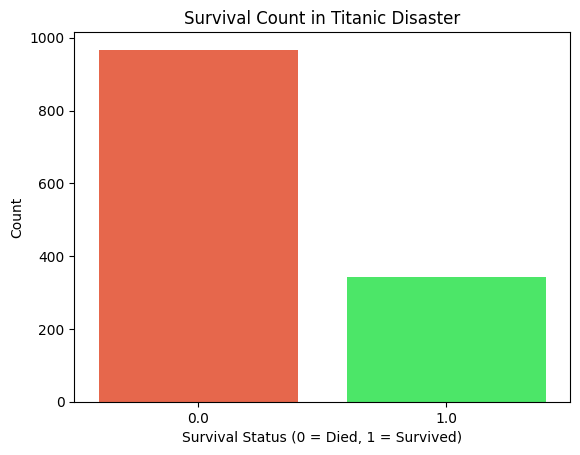

In [51]:
# For the Survived col

sns.countplot(x=df['Survived'], hue=df['Survived'], palette=["#FF5733", "#33FF57"], legend=False)
total_passengers = len(df)
death_percent = round((df['Survived'].value_counts().values[0] / total_passengers) * 100)

print(f"Out of {total_passengers}, {death_percent}% people died in the accident.")

plt.xlabel("Survival Status (0 = Died, 1 = Survived)")
plt.ylabel("Count")
plt.title("Survival Count in Titanic Disaster")
plt.show()

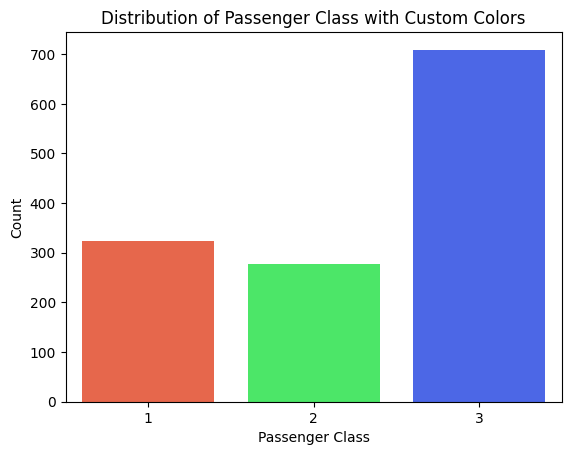

In [48]:
sns.countplot(x=df['Pclass'], hue=df['Pclass'], palette=["#FF5733", "#33FF57", "#3357FF"], legend=False)

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Distribution of Passenger Class with Custom Colors")
plt.show()

Sex
male      64.400306
female    35.599694
Name: count, dtype: float64


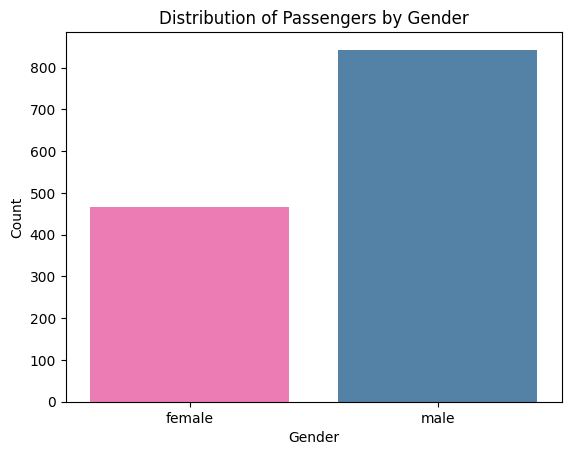

In [54]:
total_passengers = len(df)
gender_distribution = (df['Sex'].value_counts() / total_passengers) * 100
print(gender_distribution)

# Count plot for gender with custom colors
sns.countplot(x=df['Sex'], hue=df['Sex'], palette=["#FF69B4", "#4682B4"], legend=False)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Passengers by Gender")
plt.show()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


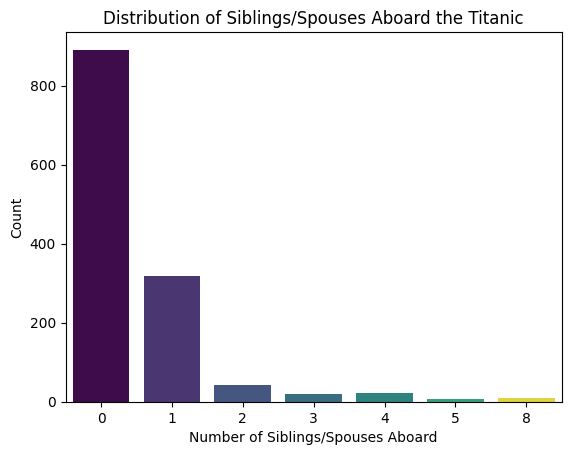

In [56]:
# Print the value counts of the 'SibSp' column
print(df['SibSp'].value_counts())
sns.countplot(x=df['SibSp'], hue=df['SibSp'], palette="viridis", legend=False)

plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Count")
plt.title("Distribution of Siblings/Spouses Aboard the Titanic")
plt.show()

Embarked
S    69.977082
C    20.626432
Q     9.396486
Name: count, dtype: float64


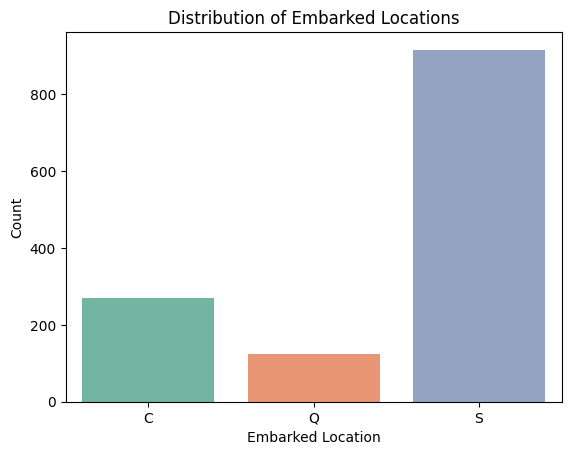

In [58]:
# Calculate and print the distribution of Embarked values dynamically
total_passengers = len(df)
embarked_distribution = (df['Embarked'].value_counts() / total_passengers) * 100
print(embarked_distribution)
sns.countplot(x=df['Embarked'], hue=df['Embarked'], palette="Set2", legend=False)

plt.xlabel("Embarked Location")
plt.ylabel("Count")
plt.title("Distribution of Embarked Locations")
plt.show()

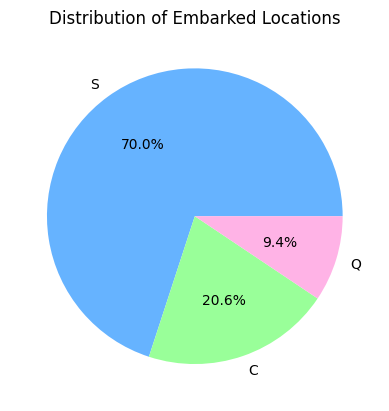

In [61]:
# Plotting the pie chart for Embarked column
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%', colors=["#66b3ff", "#99ff99", "#ffb3e6"])
plt.ylabel('')
plt.title("Distribution of Embarked Locations")
plt.show()

Skewness: 0.48907094505367193
Kurtosis: 0.9640691422559771


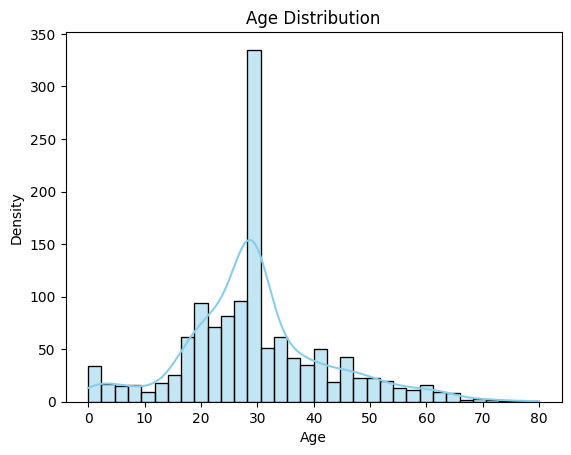

In [63]:
# Plotting the distribution of Age column
sns.histplot(df['Age'], kde=True, color='skyblue')
print("Skewness:", df['Age'].skew())
print("Kurtosis:", df['Age'].kurt())

# Display the plot
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

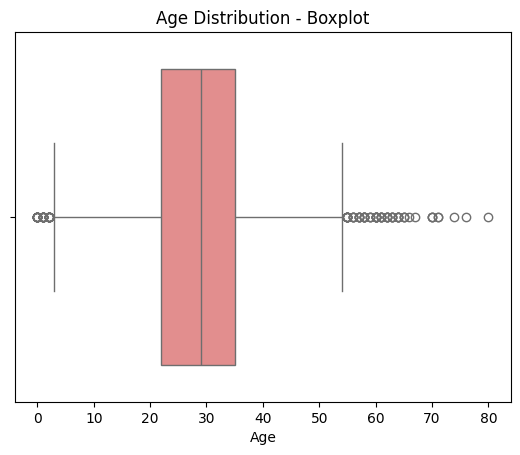

In [65]:
# Plotting the boxplot for Age column
sns.boxplot(x=df['Age'], color='lightcoral')
plt.title("Age Distribution - Boxplot")
plt.xlabel("Age")
plt.show()

In [66]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

# age can be cosidered as normal distribution

People with age in between 60 and 70 are 24
People with age greater than 70 and 75 are 6
People with age greater than 75 are 2
--------------------------------------------------
People with age between 0 and 1 12


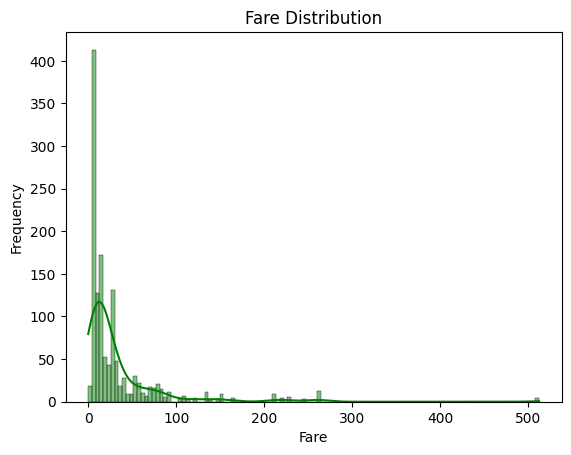

In [68]:
# Plotting the distribution of the Fare column
sns.histplot(df['Fare'], kde=True, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

In [69]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.3695095504693855
27.04966688871586


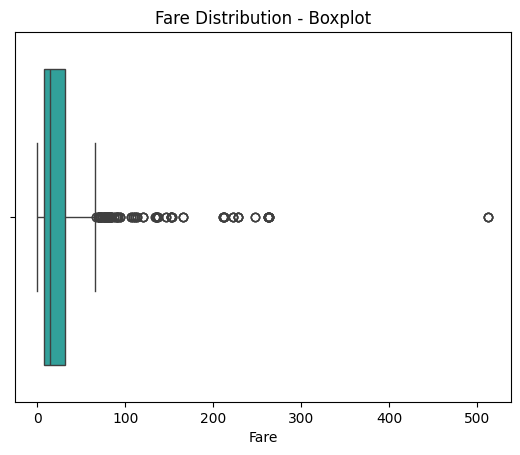

In [72]:
# Plotting the boxplot for the Fare column
sns.boxplot(x=df['Fare'], color='lightseagreen')
plt.title("Fare Distribution - Boxplot")
plt.xlabel("Fare")
plt.show()

In [73]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

# Highly skewed data, a lot of people had cheaper tickets
# Outliers are there in the data

People with fare in between $200 and $300 34
People with fare in greater than $300 4


###  Multivariate Analysis

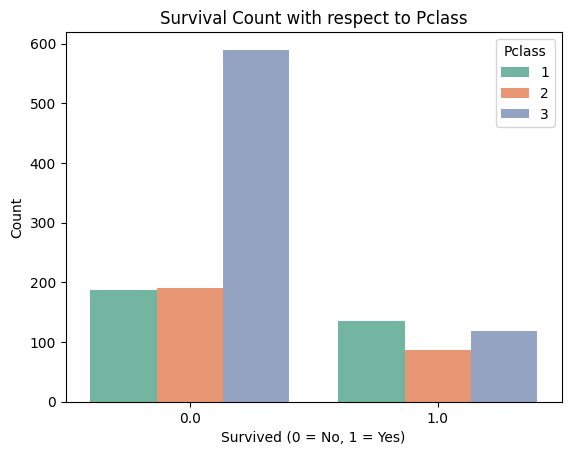

Survived   0.0   1.0
Pclass              
1         57.9  42.1
2         68.6  31.4
3         83.2  16.8


In [77]:
# Plotting survival count with respect to Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df, palette="Set2")

plt.title("Survival Count with respect to Pclass")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
survival_rate_by_class = pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(survival_rate_by_class)

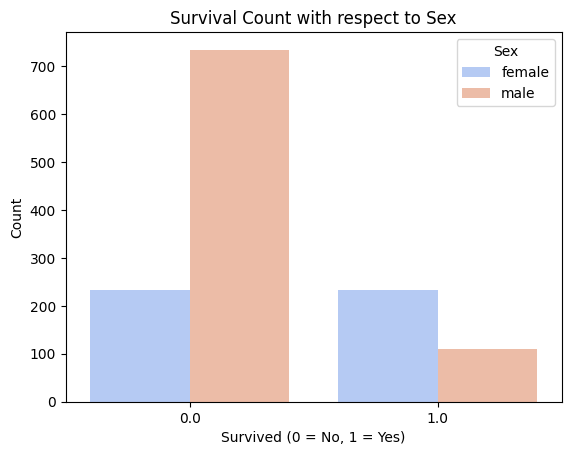

Survived   0.0   1.0
Sex                 
female    50.0  50.0
male      87.1  12.9


In [76]:
# Plotting survival count with respect to Sex
sns.countplot(x='Survived', hue='Sex', data=df, palette="coolwarm")

plt.title("Survival Count with respect to Sex")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
survival_rate_by_sex = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(survival_rate_by_sex)

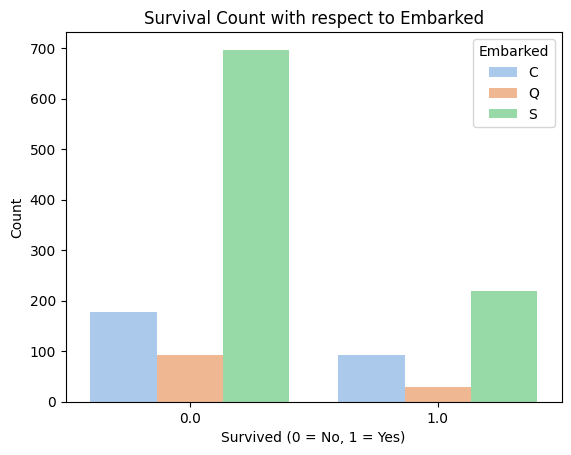

Survived   0.0   1.0
Embarked            
C         65.6  34.4
Q         75.6  24.4
S         76.1  23.9


In [79]:
# Plotting survival count with respect to Embarked
sns.countplot(x='Survived', hue='Embarked', data=df, palette="pastel")

plt.title("Survival Count with respect to Embarked")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
survival_rate_by_embarked = pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(survival_rate_by_embarked)

C:\Users\deepa\AppData\Local\Temp\ipykernel_3592\1542018611.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', kde=True, color='red')
C:\Users\deepa\AppData\Local\Temp\ipykernel_3592\1542018611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

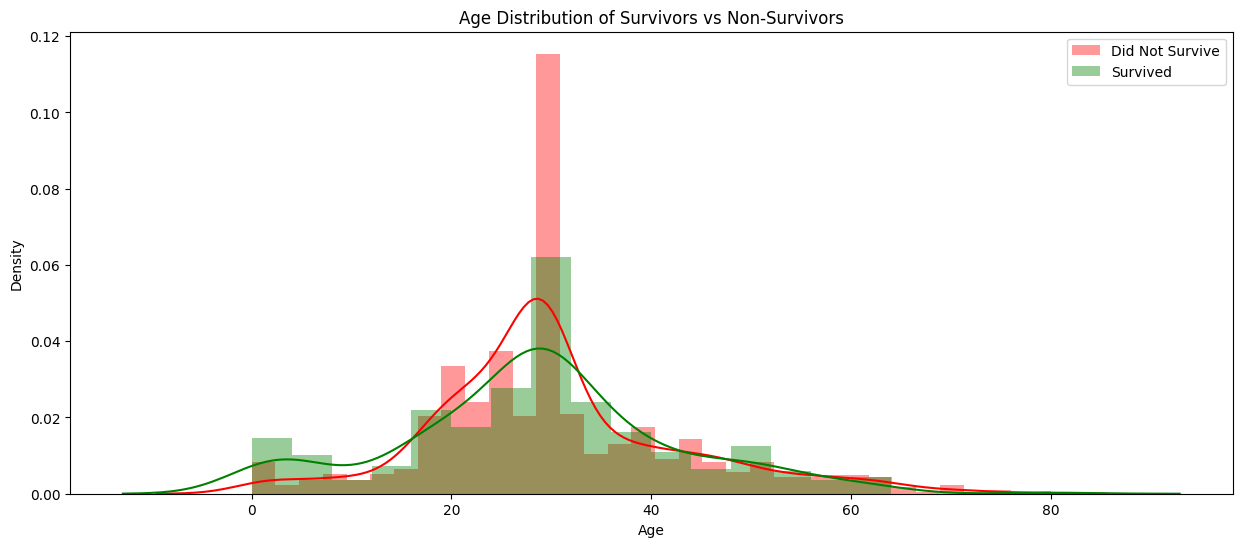

In [83]:
# Set the size of the plot
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', kde=True, color='red')
sns.distplot(df[df['Survived'] == 1]['Age'], label='Survived', kde=True, color='green')
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_3592\1917301903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_3592\1917301903.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

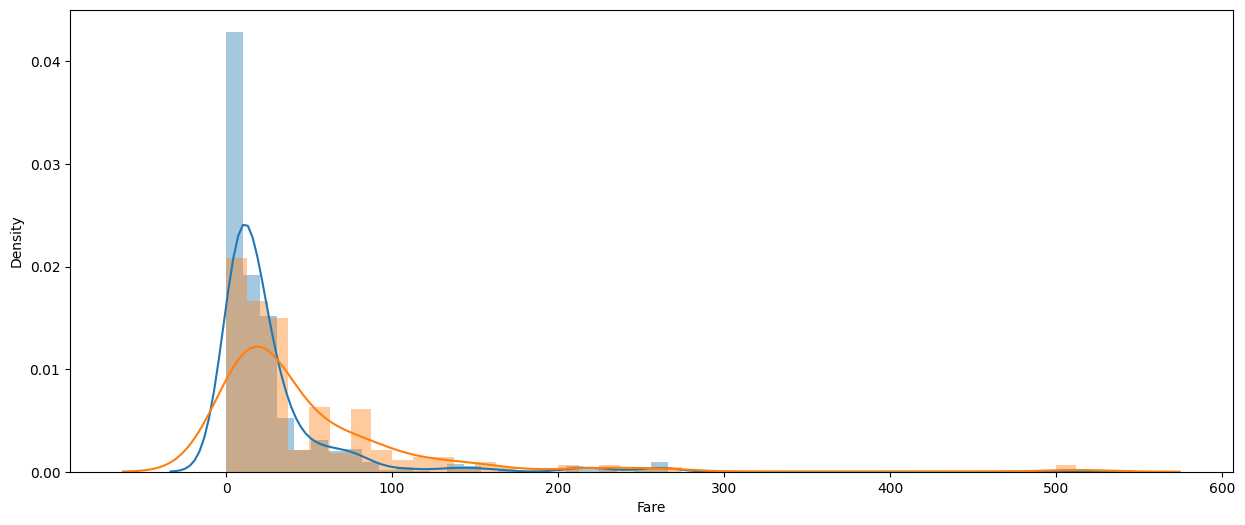

In [85]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

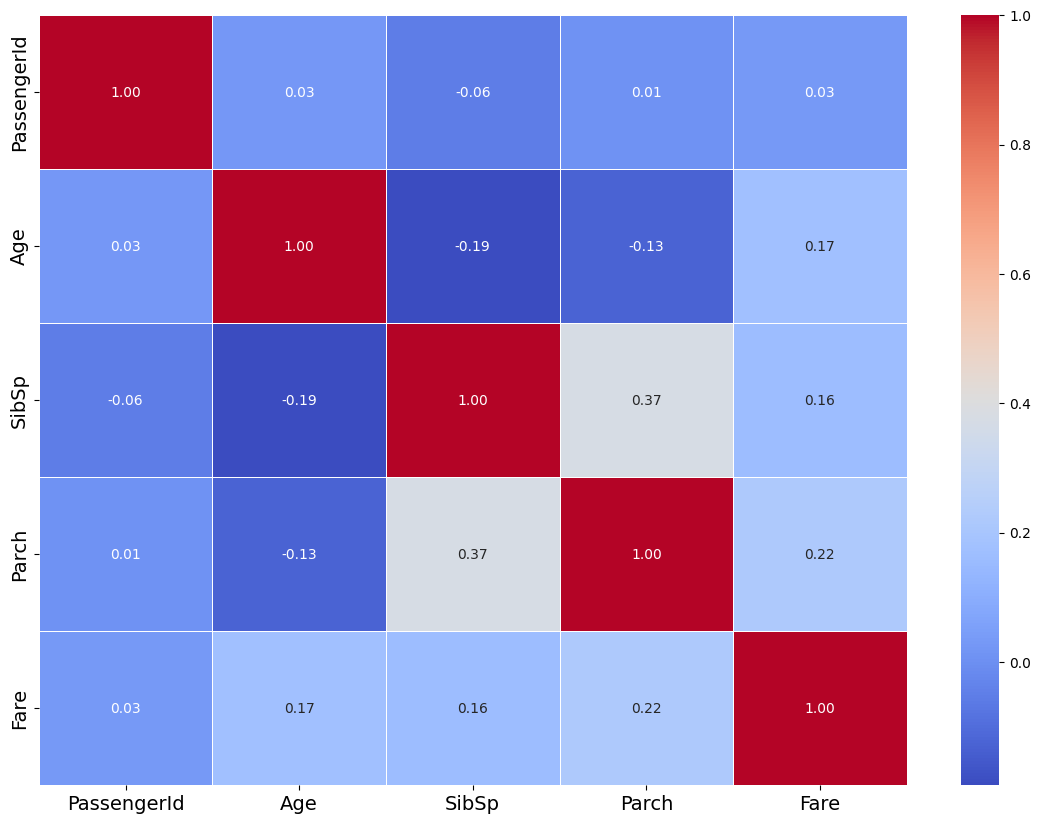

In [90]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

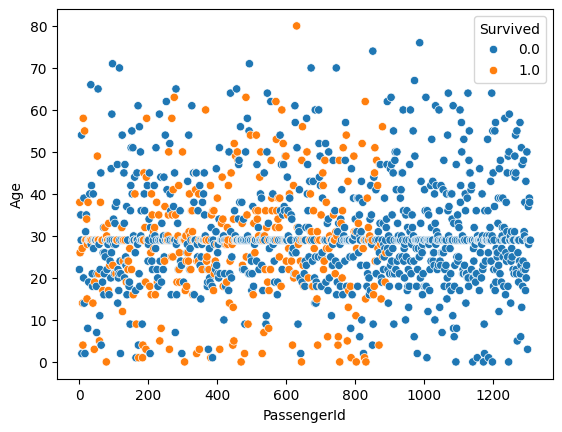

In [91]:
sns.scatterplot(x = df['PassengerId'], y = df['Age'], hue = df['Survived'])
plt.show()

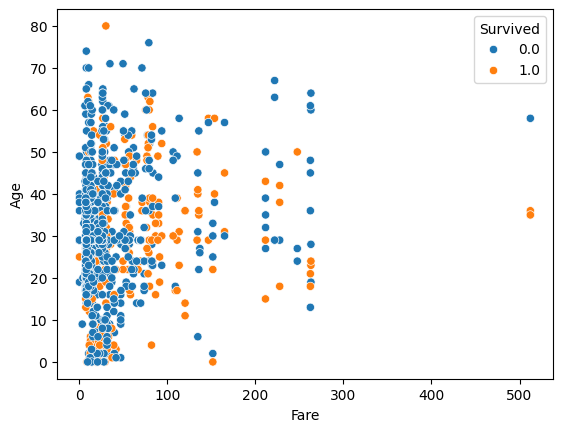

In [92]:
sns.scatterplot(x = df.Fare, y = df['Age'], hue = df['Survived'])
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

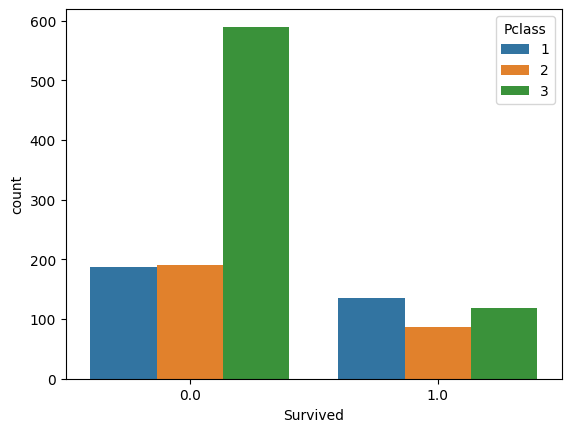

In [93]:
sns.countplot(x='Survived',hue='Pclass',data=df)

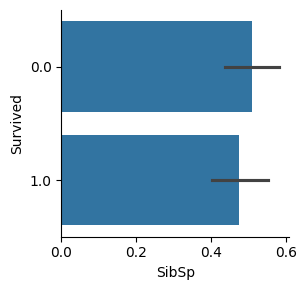

In [94]:
sns.catplot(x="SibSp", y ="Survived", data=df, kind="bar", height=3)
plt.show()

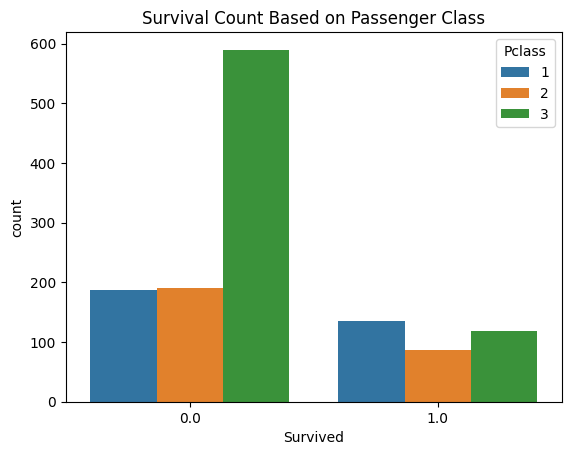

In [95]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count Based on Passenger Class")
plt.show()

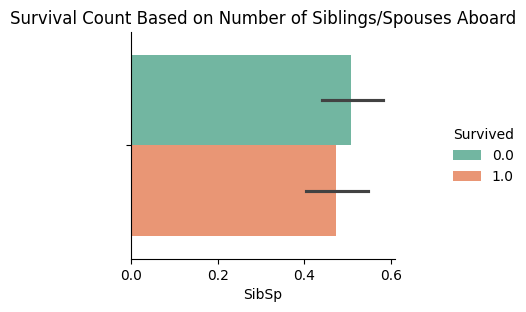

In [98]:
sns.catplot(x="SibSp", hue="Survived", data=df, kind="bar", height=3, palette="Set2")
plt.title("Survival Count Based on Number of Siblings/Spouses Aboard")
plt.show()

In [99]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0.0,50.0,87.069988
1.0,50.0,12.930012


In [100]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0.0,65.555556,75.609756,76.091703
1.0,34.444444,24.390244,23.908297


In [101]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,41.851852,48.780488,31.9869
male,58.148148,51.219512,68.0131


In [102]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,52.222222,2.439024,19.541485
2,10.370370,5.691057,26.419214
3,37.407407,91.869919,54.039301


### Feature Engineering

In [103]:
# Converting datatype of fare from float to int
df['Fare'] = df['Fare'].astype(int)

In [104]:
# Converting categorical feature to numeric 
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [105]:
embark = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35,0,0,8,0


In [107]:
# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']+ 1
df['family_size']

0       2
1       2
2       1
3       2
4       1
       ..
1304    1
1305    1
1306    1
1307    1
1308    3
Name: family_size, Length: 1309, dtype: int64

In [108]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==1:
        return "Alone"
    elif number>1 and number<=5:
        return "Medium"
    else:
        return "Large"

In [109]:
df['Family_type']=df['family_size'].apply(family_type)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,Family_type
767,768,0.0,3,"Mangan, Miss. Mary",1,30,0,0,7,2,1,Alone
1114,1115,0.0,3,"Karlsson, Mr. Einar Gervasius",0,21,0,0,7,0,1,Alone
606,607,0.0,3,"Karaic, Mr. Milan",0,30,0,0,7,0,1,Alone
441,442,0.0,3,"Hampe, Mr. Leon",0,20,0,0,9,0,1,Alone
182,183,0.0,3,"Asplund, Master. Clarence Gustaf Hugo",0,9,4,2,31,0,7,Large


In [110]:
family_type = {"Alone": 0, "Medium": 1, "Large": 2}
data = [df]

for dataset in data:
    dataset['Family_type'] = dataset['Family_type'].map(family_type)

In [111]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,7,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26,7,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35,8,0,0


In [112]:
pd.crosstab(df['Family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_type
426,427,1.0,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",1,28,26,0,1
844,845,0.0,3,"Culumovic, Mr. Jeso",0,17,8,0,0
1157,1158,0.0,1,"Chisholm, Mr. Roderick Robert Crispin",0,29,0,0,0
1139,1140,0.0,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",1,29,26,0,1
1106,1107,0.0,1,"Head, Mr. Christopher",0,42,42,0,0


In [113]:
df['Name'] = df['Name'].apply(lambda x:x.split(' ')[1])

In [114]:
Names=df.groupby('Name')['Name'].agg('count').sort_values(ascending=False)
Names

Name
Mr.             736
Miss.           256
Mrs.            191
Master.          59
Rev.              8
y                 8
Dr.               8
Col.              4
Planke,           4
Billiard,         3
Impe,             3
Mlle.             2
Ms.               2
Major.            2
Gordon,           2
Messemaeker,      2
Carlo,            2
Brito,            1
Melkebeke,        1
Jonkheer.         1
Khalil,           1
Don.              1
Cruyssen,         1
Capt.             1
Mme.              1
Mulder,           1
Pelsmaeker,       1
Palmquist,        1
Steen,            1
Shawah,           1
Velde,            1
Walle,            1
der               1
the               1
Name: Name, dtype: int64

In [115]:
df['Name']=df['Name'].apply(lambda x: 'Royalty' if x in Names[Names<=10] else x)
len(df['Name'].unique())

5

In [116]:
df.Name.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Royalty'], dtype=object)

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_type
0,1,0.0,3,Mr.,0,22,7,0,1
1,2,1.0,1,Mrs.,1,38,71,1,1
2,3,1.0,3,Miss.,1,26,7,0,0
3,4,1.0,1,Mrs.,1,35,53,0,1
4,5,0.0,3,Mr.,0,35,8,0,0


### Detecting outliers

In [118]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_type
0,1,0.0,3,Mr.,0,22,7,0,1
1,2,1.0,1,Mrs.,1,38,71,1,1
2,3,1.0,3,Miss.,1,26,7,0,0
3,4,1.0,1,Mrs.,1,35,53,0,1
4,5,0.0,3,Mr.,0,35,8,0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,Mr.,0,29,8,0,0
1305,1306,0.0,1,Royalty,1,39,108,1,0
1306,1307,0.0,3,Mr.,0,38,7,0,0
1307,1308,0.0,3,Mr.,0,29,8,0,0


In [119]:
# handling outliers from Fare column

# Finding quartiles

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_type
0,1,0.0,3,Mr.,0,22,7,0,1
2,3,1.0,3,Miss.,1,26,7,0,0
3,4,1.0,1,Mrs.,1,35,53,0,1
4,5,0.0,3,Mr.,0,35,8,0,0
5,6,0.0,3,Mr.,0,29,8,2,0
...,...,...,...,...,...,...,...,...,...
1303,1304,0.0,3,Miss.,1,28,7,0,0
1304,1305,0.0,3,Mr.,0,29,8,0,0
1306,1307,0.0,3,Mr.,0,38,7,0,0
1307,1308,0.0,3,Mr.,0,29,8,0,0


In [120]:
# One hot encoding

df.sample(4)

# Col to be transformed is Name

pd.get_dummies(data=df, columns=['Name'], drop_first=True)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Royalty
0,1,0.0,3,0,22,7,0,1,False,True,False,False
2,3,1.0,3,1,26,7,0,0,True,False,False,False
3,4,1.0,1,1,35,53,0,1,False,False,True,False
4,5,0.0,3,0,35,8,0,0,False,True,False,False
5,6,0.0,3,0,29,8,2,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,0.0,3,1,28,7,0,0,True,False,False,False
1304,1305,0.0,3,0,29,8,0,0,False,True,False,False
1306,1307,0.0,3,0,38,7,0,0,False,True,False,False
1307,1308,0.0,3,0,29,8,0,0,False,True,False,False


In [121]:
df=pd.get_dummies(data=df, columns=['Name'], drop_first=True)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Royalty
0,1,0.0,3,0,22,7,0,1,False,True,False,False
2,3,1.0,3,1,26,7,0,0,True,False,False,False
3,4,1.0,1,1,35,53,0,1,False,False,True,False
4,5,0.0,3,0,35,8,0,0,False,True,False,False
5,6,0.0,3,0,29,8,2,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,0.0,3,1,28,7,0,0,True,False,False,False
1304,1305,0.0,3,0,29,8,0,0,False,True,False,False
1306,1307,0.0,3,0,38,7,0,0,False,True,False,False
1307,1308,0.0,3,0,29,8,0,0,False,True,False,False


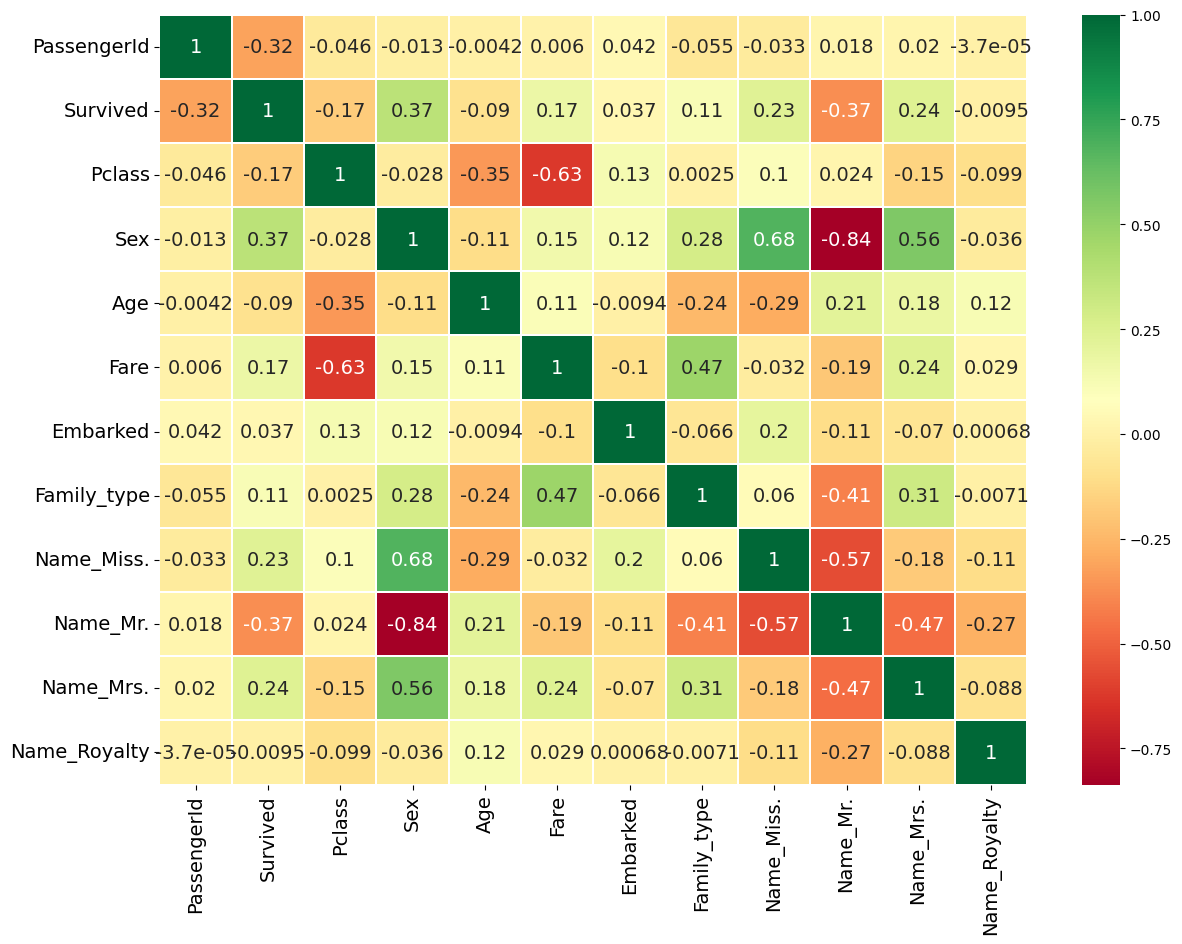

In [122]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()